In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [2]:
# crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-LA-Project/Mar424_converted_77_Features')
# print(crime_df.shape)

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
crime_df=pd.read_csv("Min_downsampled_df_Mar7_ 539576.csv", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (539576, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

# Prepare for Data Training

In [5]:
# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])

In [6]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [7]:
# !pip install xgboost

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

## Drop columns

In [9]:
# Drop all the weather
crime_df=crime_df.drop(['Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure','Total_Precipitation'], axis =1)

# Droop all victim
crime_df=crime_df.drop(['Vict_Sex_M', 'Vict_Sex_X','Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White'], axis =1)

In [10]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Crime_Category', 'Crime_Category_Code', 'Weapon_Reported', 'AREA_2',
       'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9',
       'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15',
       'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4',
       'Day_of_Week_5', 'Day_of_Week_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022', 'Year_2023'],
      dtype='object')

# Data Training

In [11]:
# Selecting predictor and target variables

X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model LR -Without Victim, Weather: lr_wo_victim_weather

In [14]:
# Training the model and predicting- LR-Full data

logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.47679676785648095
Confusion Matrix:
[[ 9516   189     3  3626     9     9   106    62]
 [   25  8214   199     0     2    78  1941  3068]
 [ 2343  1104   338   350    17  7269   926  1218]
 [  107   105     6 12998     0    42    68   154]
 [ 1232  3200    58  4562     4   149  1724  2509]
 [    4   124   124   571     2 12195    54   127]
 [ 1069  4944   370    41    11   208  3008  3872]
 [  672  4838   354     0    12     0  2605  5181]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.64      0.70      0.67     13520
        Fraud and Financial Crimes       0.36      0.61      0.45     13527
              Miscellaneous Crimes       0.23      0.02      0.05     13565
             Robbery and Extortion       0.59      0.96      0.73     13480
                   Sexual Offenses       0.07      0.00      0.00     13438
                Theft and Burglary       0

In [15]:
# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.64      0.70      0.67     13520
        Fraud and Financial Crimes       0.36      0.61      0.45     13527
              Miscellaneous Crimes       0.23      0.02      0.05     13565
             Robbery and Extortion       0.59      0.96      0.73     13480
                   Sexual Offenses       0.07      0.00      0.00     13438
                Theft and Burglary       0.61      0.92      0.74     13201
     Vandalism and Property Damage       0.29      0.22      0.25     13523
 Violations and Restraining Orders       0.32      0.38      0.35     13662

                          accuracy                           0.48    107916
                         macro avg       0.39      0.48      0.40    107916
                      weighted avg       0.39      0.48      0.40    107916



In [16]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
4   Weapon_Reported    2.494305
1          Vict_Age    0.338555
0          Part_1-2    0.117544
54        Year_2023    0.074355
34          Month_5    0.072320
39         Month_10    0.071045
38          Month_9    0.070067
36          Month_7    0.069622
37          Month_8    0.066730
40         Month_11    0.062269
2               LAT    0.061615
30    Day_of_Week_6    0.060191
35          Month_6    0.058146
32          Month_3    0.057563
41         Month_12    0.053928
33          Month_4    0.053634
48        Year_2017    0.045545
31          Month_2    0.044975
52        Year_2021    0.044060
50        Year_2019    0.039052
8            AREA_5    0.032700
49        Year_2018    0.026541
29    Day_of_Week_5    0.026534
3               LON    0.025999
51        Year_2020    0.023752
53        Year_2022    0.018091
47        Year_2016    0.016551
46        Year_2015    0.015434
45        Year_2014    0.013379
26    Day_of_Week_2

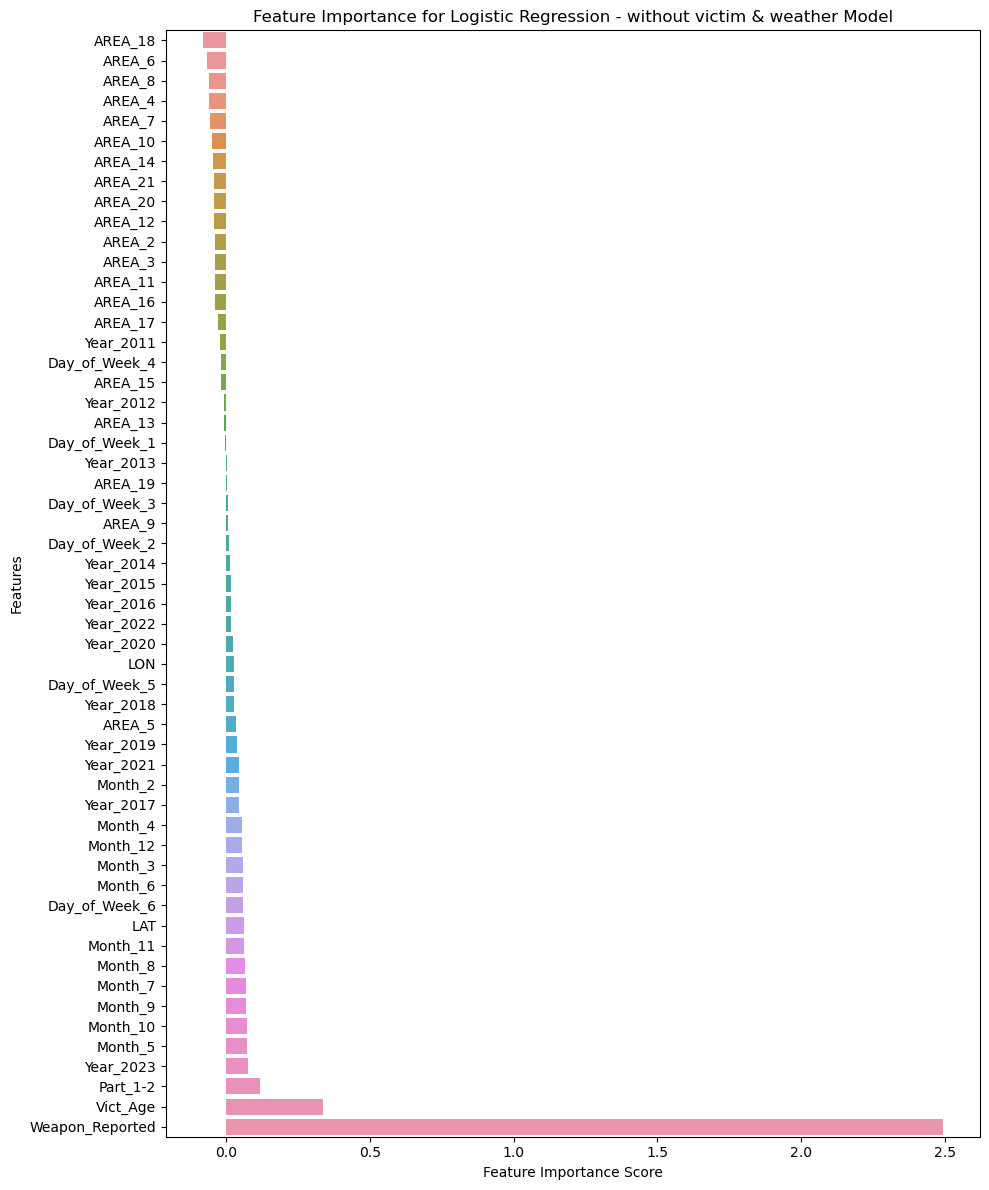

In [17]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression - without victim & weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

## Model XGBOOST Without Victim, Weather: xgb_wo_victim_weather

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")


XGBoost
Accuracy: 0.5213128729752771
Confusion Matrix:
[[ 8965   192   522  3349   325     9    98    60]
 [   22  8645    94     0   268    81  2118  2299]
 [ 1053   993  2834   328   526  6161   832   838]
 [  166   121    11 12457   499    55    67   104]
 [  950  3239   250  3254  2945   144  1278  1378]
 [    8   120  1020   528    25 11321    77   102]
 [  866  4825   245    40   236   191  3922  3198]
 [  611  4558   192     0   334    15  2783  5169]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.71      0.66      0.69     13520
        Fraud and Financial Crimes       0.38      0.64      0.48     13527
              Miscellaneous Crimes       0.55      0.21      0.30     13565
             Robbery and Extortion       0.62      0.92      0.75     13480
                   Sexual Offenses       0.57      0.22      0.32     13438
                Theft and Burglary       0.63      0.86

In [19]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
0          Part_1-2    0.418932
4   Weapon_Reported    0.415257
1          Vict_Age    0.014296
17          AREA_14    0.008895
8            AREA_5    0.008546
54        Year_2023    0.005457
21          AREA_18    0.004774
7            AREA_4    0.004752
18          AREA_15    0.004689
30    Day_of_Week_6    0.004204
42        Year_2011    0.004002
53        Year_2022    0.003898
52        Year_2021    0.003805
11           AREA_8    0.003708
51        Year_2020    0.003503
9            AREA_6    0.003456
49        Year_2018    0.003355
50        Year_2019    0.003305
29    Day_of_Week_5    0.003089
12           AREA_9    0.002972
24          AREA_21    0.002933
15          AREA_12    0.002897
6            AREA_3    0.002879
22          AREA_19    0.002869
16          AREA_13    0.002817
3               LON    0.002797
2               LAT    0.002794
43        Year_2012    0.002774
23          AREA_20    0.002706
19          AREA_16

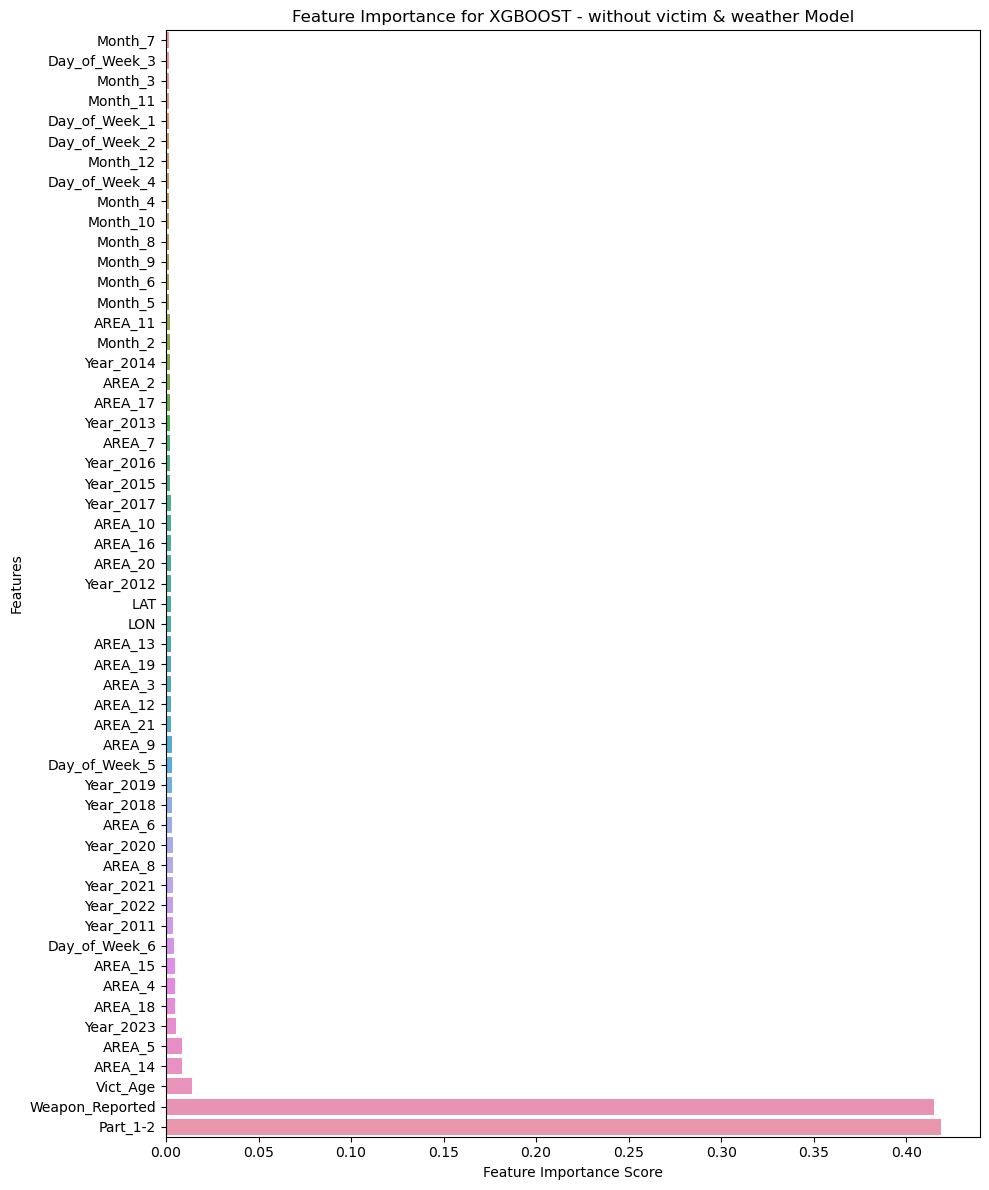

In [20]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - without victim & weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# Model RANDOM FOREST -Without Victim, Weather: rf_wo_victim_weather

In [21]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.5459709403610216
Confusion Matrix:
[[ 9320   154   456  2918   415    22   159    76]
 [   32  7323   219    17   866    76  2683  2311]
 [ 1107   805  4207   270   551  5106   803   716]
 [  533    91    31 11885   728    54    78    80]
 [  850  1978   334  2507  5304   127  1240  1098]
 [   24   118  2214   481    56 10147    87    74]
 [  851  3850   448    44   725   173  4558  2874]
 [  536  3133   340    12   700    20  2746  6175]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.70      0.69      0.70     13520
        Fraud and Financial Crimes       0.42      0.54      0.47     13527
              Miscellaneous Crimes       0.51      0.31      0.39     13565
             Robbery and Extortion       0.66      0.88      0.75     13480
                   Sexual Offenses       0.57      0.39      0.47     13438
                Theft and Burgl

In [22]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
2               LAT    0.153299
3               LON    0.152670
1          Vict_Age    0.151634
0          Part_1-2    0.125909
4   Weapon_Reported    0.119862
28    Day_of_Week_4    0.013577
26    Day_of_Week_2    0.013184
25    Day_of_Week_1    0.013055
27    Day_of_Week_3    0.012934
32          Month_3    0.011033
36          Month_7    0.010963
37          Month_8    0.010948
33          Month_4    0.010873
39         Month_10    0.010865
34          Month_5    0.010860
35          Month_6    0.010767
38          Month_9    0.010516
40         Month_11    0.010301
41         Month_12    0.010124
31          Month_2    0.009949
29    Day_of_Week_5    0.009401
48        Year_2017    0.008059
47        Year_2016    0.007828
30    Day_of_Week_6    0.007804
45        Year_2014    0.007742
46        Year_2015    0.007187
44        Year_2013    0.007007
43        Year_2012    0.006976
49        Year_2018    0.006788
50        Year_2019

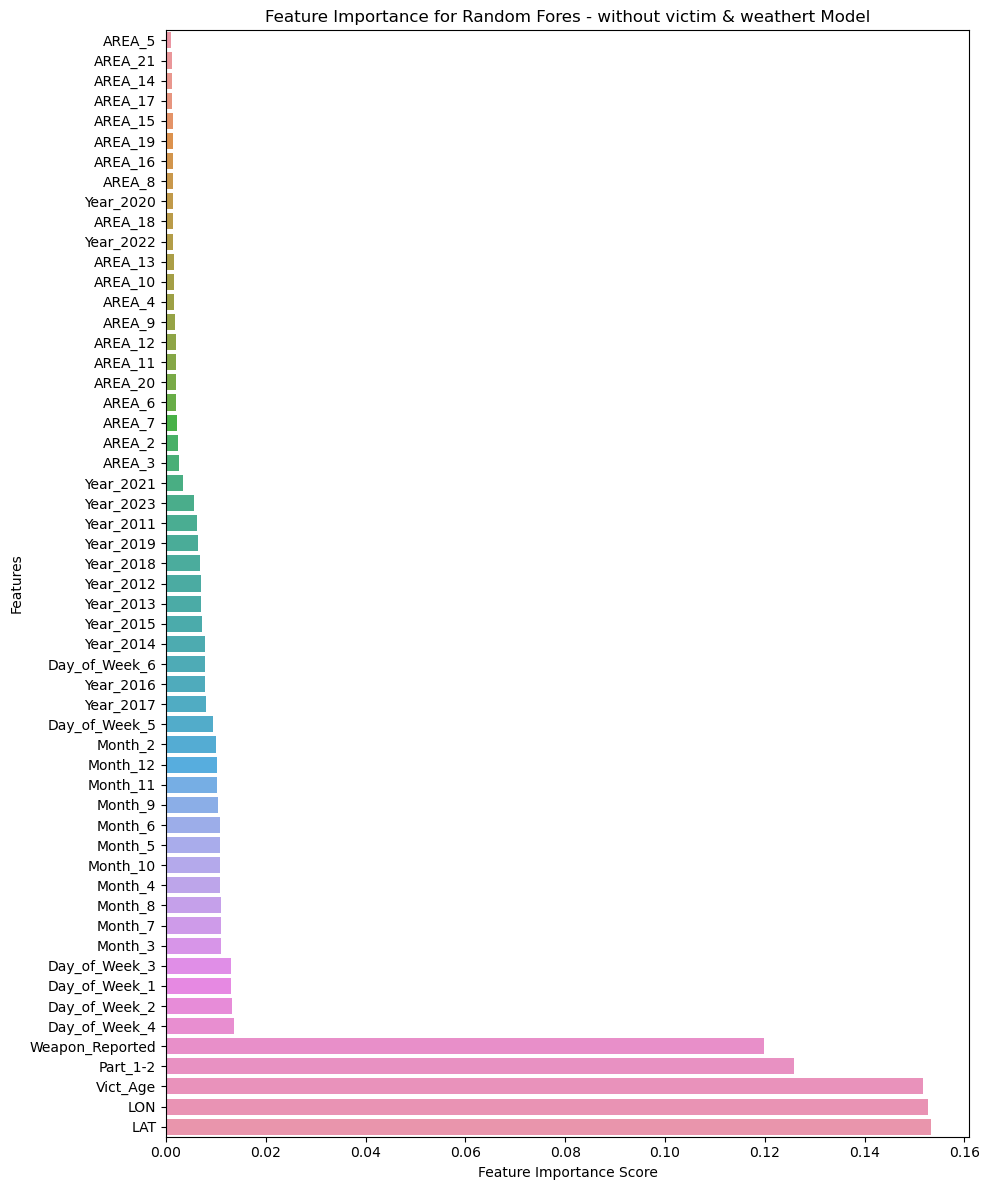

In [30]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Fores - without victim & weathert Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# Model KNN7 -Without Victim, Weather: knn_wo_victim_weather

In [24]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.3407835724081693
Confusion Matrix:
[[6601  951  669 2870 1105  254  580  490]
 [ 372 6465  643   28 1464  256 2181 2118]
 [1588 2136 2899  921 1251 2725 1048  997]
 [3246  205  862 7175  978  822   82  110]
 [2099 2878  924 1947 2390  514 1419 1267]
 [ 356 1595 3254 1075  827 4879  638  577]
 [1112 4235  906  186 1492  438 2858 2296]
 [ 755 4106  873   95 1449  348 2527 3509]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.41      0.49      0.45     13520
        Fraud and Financial Crimes       0.29      0.48      0.36     13527
              Miscellaneous Crimes       0.26      0.21      0.24     13565
             Robbery and Extortion       0.50      0.53      0.52     13480
                   Sexual Offenses       0.22      0.18      0.20     13438
                Theft and Burglary       0.48      0.37      0.42     13201
     Vandalism and Property Damage       0.25  

In [25]:
# Take too long, not not sure it's work or not?

# from sklearn.inspection import permutation_importance
# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [39]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (539576, 55)
Index(['Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Weapon_Reported', 'AREA_2',
       'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9',
       'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15',
       'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4',
       'Day_of_Week_5', 'Day_of_Week_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022', 'Year_2023'],
      dtype='object')


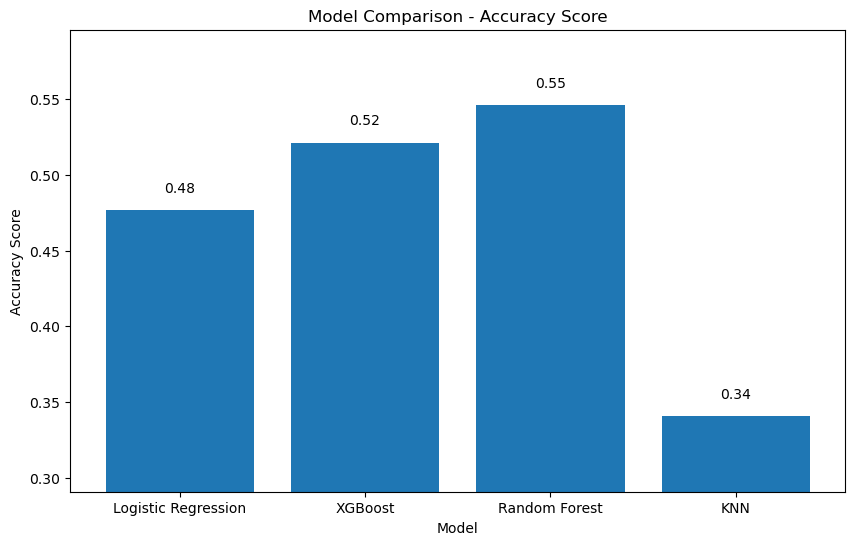

In [32]:
import matplotlib.pyplot as plt

# Placeholder for accuracy scores
accuracy_scores = {}

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = logreg_accuracy

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_scores['XGBoost'] = xgb_accuracy

# Random Forest
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
accuracy_scores['Random Forest'] = rf_accuracy

# KNN
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
accuracy_scores['KNN'] = knn_accuracy

# Now create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Score')
plt.ylim([min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05])
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()
